In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
types = ['fake', 'satire', 'bias', 'conspiracy', 'junksci', 'hate', 'clickbait', 'unreliable', 'political', 'reliable']

## Setting up data

In [3]:
# Insert filepath for large cleaned dataset to make plots on whole dataset
# These plots are only made with the cleaned 25k
data = pd.read_csv('/home/knud/Downloads/clean_corpus_25k.csv')
data.head(3)

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,type_id,content_tokenize
0,1496,338715.0,theinternetpost.net,fake,https://theinternetpost.net/tag/global-war/,we are witnessing a great turning inward in th...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,THE INTERNET POST,NaN,NaN,NaN,Posts about Global War written by ajfloyd and ...,"global conflict, war on terror, United States,...",NaN,NaN,3,"['we', 'are', 'witnessing', 'a', 'great', 'tur..."
1,8192,30948.0,beforeitsnews.com,fake,http://beforeitsnews.com/spirit/2013/06/more-t...,more than a parade and my new manifesto of rea...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"More than a parade, and my new manifesto",Lisa Beck Living,NaN,NaN,NaN,NaN,NaN,NaN,3,"['more', 'than', 'a', 'parade', 'and', 'my', '..."
2,5154,819308.0,beforeitsnews.com,fake,http://beforeitsnews.com/international/2013/01...,dallas gun buyback program countered with succ...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Dallas Gun Buyback Program Countered With Succ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"['dallas', 'gun', 'buyback', 'program', 'count..."


## Barplot

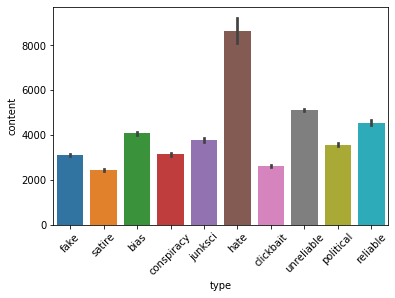

In [4]:
# Barplot
plot = sns.barplot(data = data, x = 'type', y = data['content'].str.len())
# y might be wrong value. Unsure if it is max-length or average

for item in plot.get_xticklabels():
    item.set_rotation(45)

plot

## Distribution plots - Might not be useful

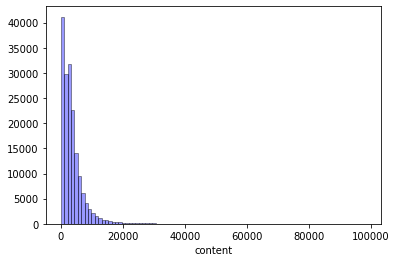

In [5]:
sns.distplot(data['content'].str.len(), hist=True, kde=False, 
             bins=int(90), color = 'blue',
             hist_kws={'edgecolor':'black'})

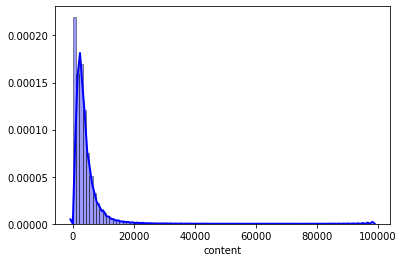

In [6]:
sns.distplot(data['content'].str.len(), hist=True, kde=True, 
             bins=int(90), color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Types')

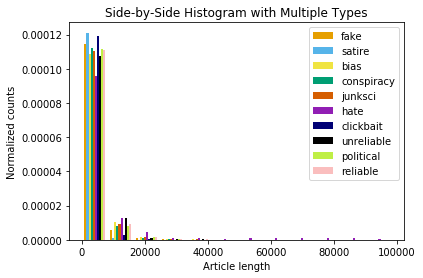

In [7]:
# Side-by-side Histogram

# Make a separate list for each type
x1 = list(data[data['type'] == 'fake']['content'].str.len())
x2 = list(data[data['type'] == 'satire']['content'].str.len())
x3 = list(data[data['type'] == 'bias']['content'].str.len())
x4 = list(data[data['type'] == 'conspiracy']['content'].str.len())
x5 = list(data[data['type'] == 'junksci']['content'].str.len())
x6 = list(data[data['type'] == 'hate']['content'].str.len())
x7 = list(data[data['type'] == 'clickbait']['content'].str.len())
x8 = list(data[data['type'] == 'unreliable']['content'].str.len())
x9 = list(data[data['type'] == 'political']['content'].str.len())
x10 = list(data[data['type'] == 'reliable']['content'].str.len())

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', '#911EB4','#000075','000000','#BFEF45','#FABEBE']


# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10], bins = int(180/15), density=True,
         color = colors, label=types)

# Plot formatting
plt.legend()
plt.xlabel('Article length')
plt.ylabel('Normalized counts')
plt.title('Side-by-Side Histogram with Multiple Types')

Text(0, 0.5, 'Density')

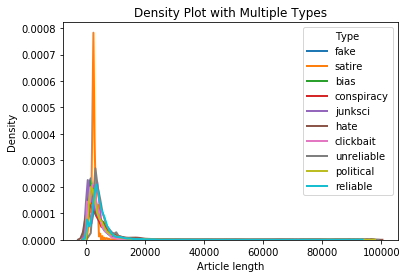

In [8]:
# Density plot with multiple types
# The y-axis in a density plot is the probability density function for the kernel density estimation

types = ['fake', 'satire', 'bias', 'conspiracy', 'junksci', 'hate',
       'clickbait', 'unreliable', 'political', 'reliable']

# Iterate through the types
for type in types:
    # Subset to the type
    subset = data[data['type'] == type]
    
    # Draw the density plot
    sns.distplot(subset['content'].str.len(), hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = type)

# Plot formatting
plt.legend(prop={'size': 10}, title = 'Type')
plt.title('Density Plot with Multiple Types')
plt.xlabel('Article length')
plt.ylabel('Density')